In [17]:
import pandas as pd
import os
import numpy as np
from pathlib import Path

# CSV dosyasının yolu
META_PATH = os.path.join("..","Data", "HAM10000_metadata.csv")
image_dir = Path("../Data/HAM10000_all_images")
# Metadata’yı yükle
df_data = pd.read_csv(META_PATH)


In [18]:
print(df_data.head())
print(df_data.info())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [19]:
print("Sınıf dağılımı:\n", df_data['dx'].value_counts())


Sınıf dağılımı:
 dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [20]:
lesion_counts = df_data.groupby('lesion_id').size()
print("Lezyon başına düşen görüntü sayılarının istatistikleri:\n", lesion_counts.describe())
print("Lezyonu birden fazla görüntü içeren ID sayısı:", (lesion_counts > 1).sum())


Lezyon başına düşen görüntü sayılarının istatistikleri:
 count    7470.000000
mean        1.340696
std         0.633970
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
dtype: float64
Lezyonu birden fazla görüntü içeren ID sayısı: 1956


In [21]:
# change dataframe index
df_data = pd.read_csv(META_PATH).set_index('image_id')
df_data.head()

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [22]:
# lesion mapping
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df_data['label'] = df_data.dx.astype('category').cat.codes
df_data['lesion_type'] = df_data.dx.map(lesion_type_dict)
df_data.head()

,lesion_id,dx,dx_type,age,sex,localization,label,lesion_type
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis


In [23]:
# image path 
df_data['path'] = [image_dir / f"{fn}.jpg" for fn in df_data.index.values]
df_data.head()

,lesion_id,dx,dx_type,age,sex,localization,label,lesion_type,path
image_id,,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis,..\Data\HAM10000_all_images\ISIC_0027419.jpg
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis,..\Data\HAM10000_all_images\ISIC_0025030.jpg
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis,..\Data\HAM10000_all_images\ISIC_0026769.jpg
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis,..\Data\HAM10000_all_images\ISIC_0025661.jpg
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis,..\Data\HAM10000_all_images\ISIC_0031633.jpg


In [24]:
label_list = df_data['label'].value_counts().keys().tolist()
lesion_list = df_data['lesion_type'].value_counts().keys().tolist()
label_to_lesion = dict(zip(label_list, lesion_list))
label_to_lesion


{5: 'Melanocytic nevi',
 4: 'Melanoma',
 2: 'Benign keratosis',
 1: 'Basal cell carcinoma',
 0: 'Actinic keratoses',
 6: 'Vascular lesions',
 3: 'Dermatofibroma'}

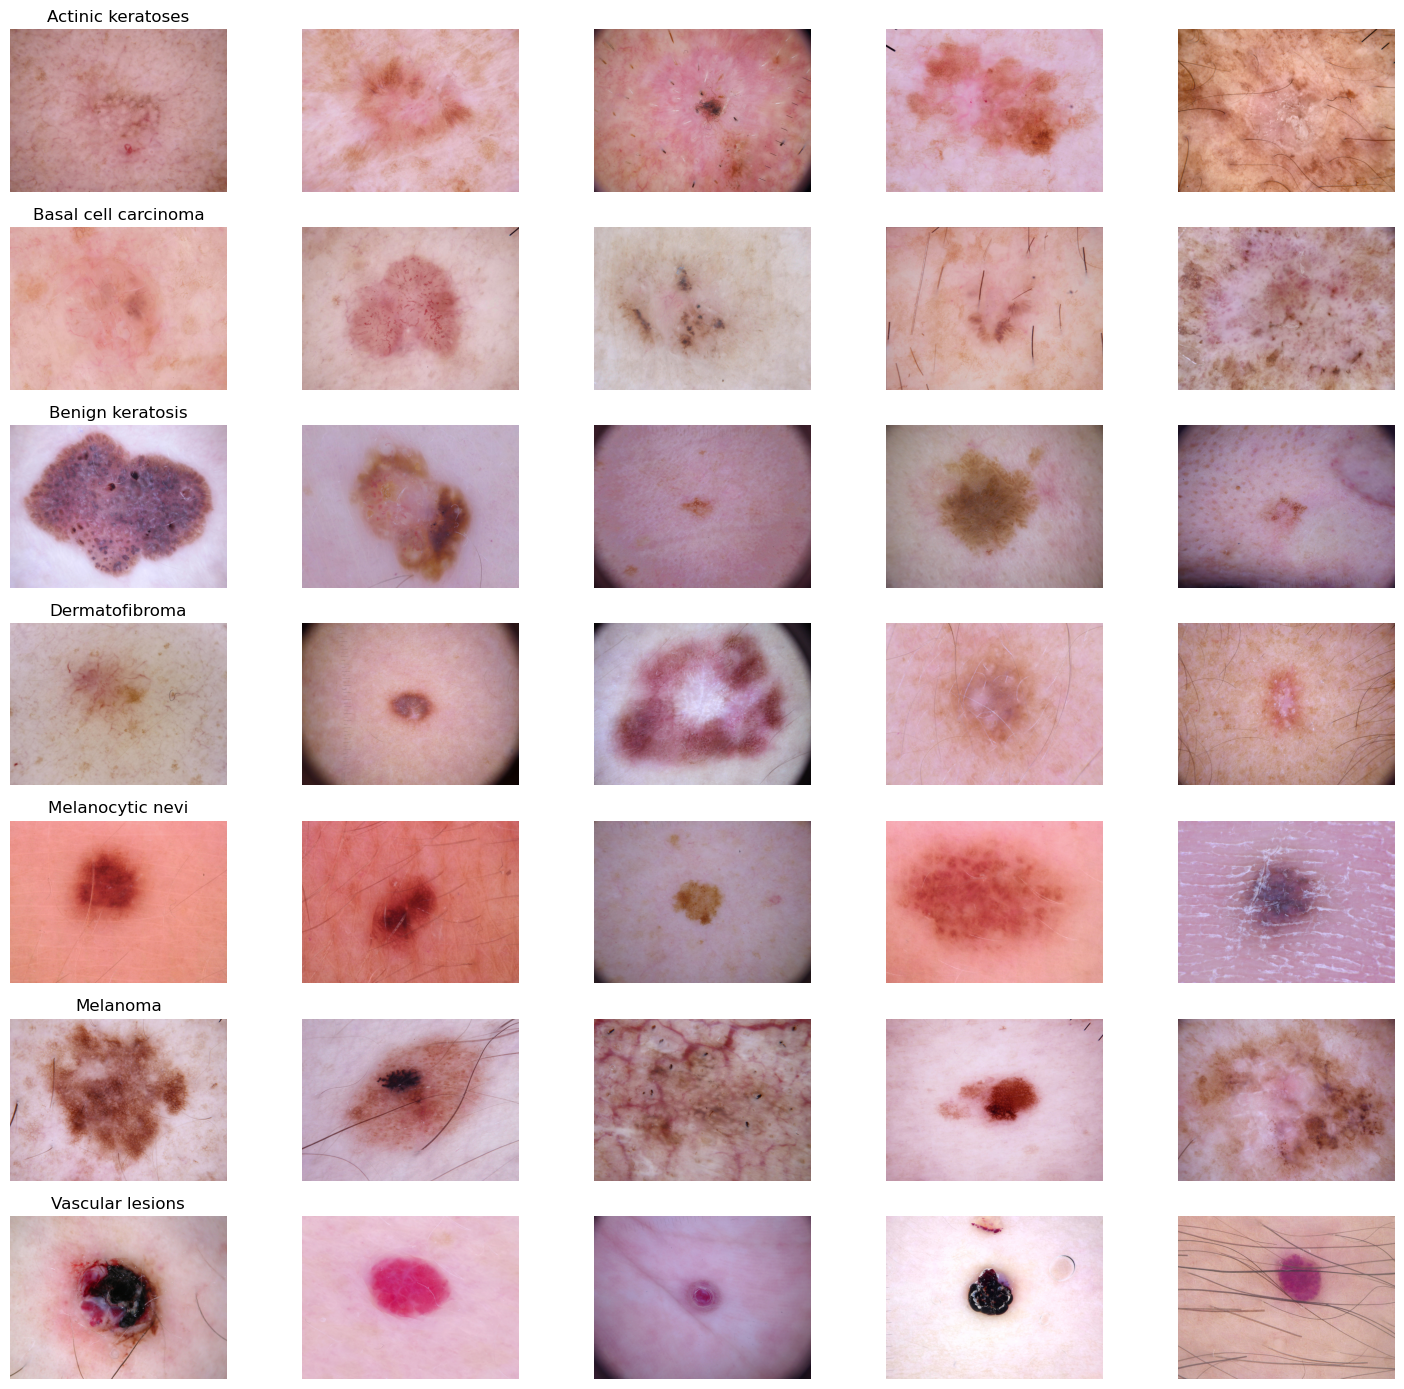

In [25]:
import matplotlib.pyplot as plt
from skimage.io import imread

def show_images(df, col, n_samples=5):
    """
    DataFrame içinde belirli bir sütundaki her benzersiz değer için örnek görseller gösterir.

    Args:
        df (pd.DataFrame): Görsel yolu (path) ve kategori bilgisi içeren DataFrame
        col (str): Hangi kolona göre gruplanacak (örneğin 'lesion_type')
        n_samples (int): Her gruptan kaç örnek gösterilecek
    """
    groups = df.sort_values([col]).groupby(col)
    n_rows = len(groups)

    # Subplots oluştur
    fig, axs = plt.subplots(n_rows, n_samples, figsize=(3*n_samples, 2*n_rows))

    # Eğer 1 satır varsa düzelt
    if n_rows == 1:
        axs = [axs]

    for row_axs, (group_name, group_rows) in zip(axs, groups):
        # Eğer sadece 1 örnek varsa, row_axs bir liste olmayabilir, onu liste yap
        if n_samples == 1:
            row_axs = [row_axs]
        
        sampled_rows = group_rows.sample(min(n_samples, len(group_rows)), random_state=42)

        for ax, (_, sample_row) in zip(row_axs, sampled_rows.iterrows()):
            img = imread(sample_row['path'])
            ax.imshow(img)
            ax.axis('off')

        # Satırın ilk sütununa sınıf ismini yaz
        row_axs[0].set_title(group_name, fontsize=12)

    plt.tight_layout()
    plt.show()

show_images(df_data, 'lesion_type', n_samples=5)


C:\Users\sanem\AppData\Local\Temp\ipykernel_26540\1710397446.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_data, x='dx', order=df_data['dx'].value_counts().index, palette="viridis")
C:\Users\sanem\AppData\Local\Temp\ipykernel_26540\1710397446.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_data, x='sex', palette="pastel")
C:\Users\sanem\AppData\Local\Temp\ipykernel_26540\1710397446.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_data, y='localization', order=df_data['localization'].value_counts()

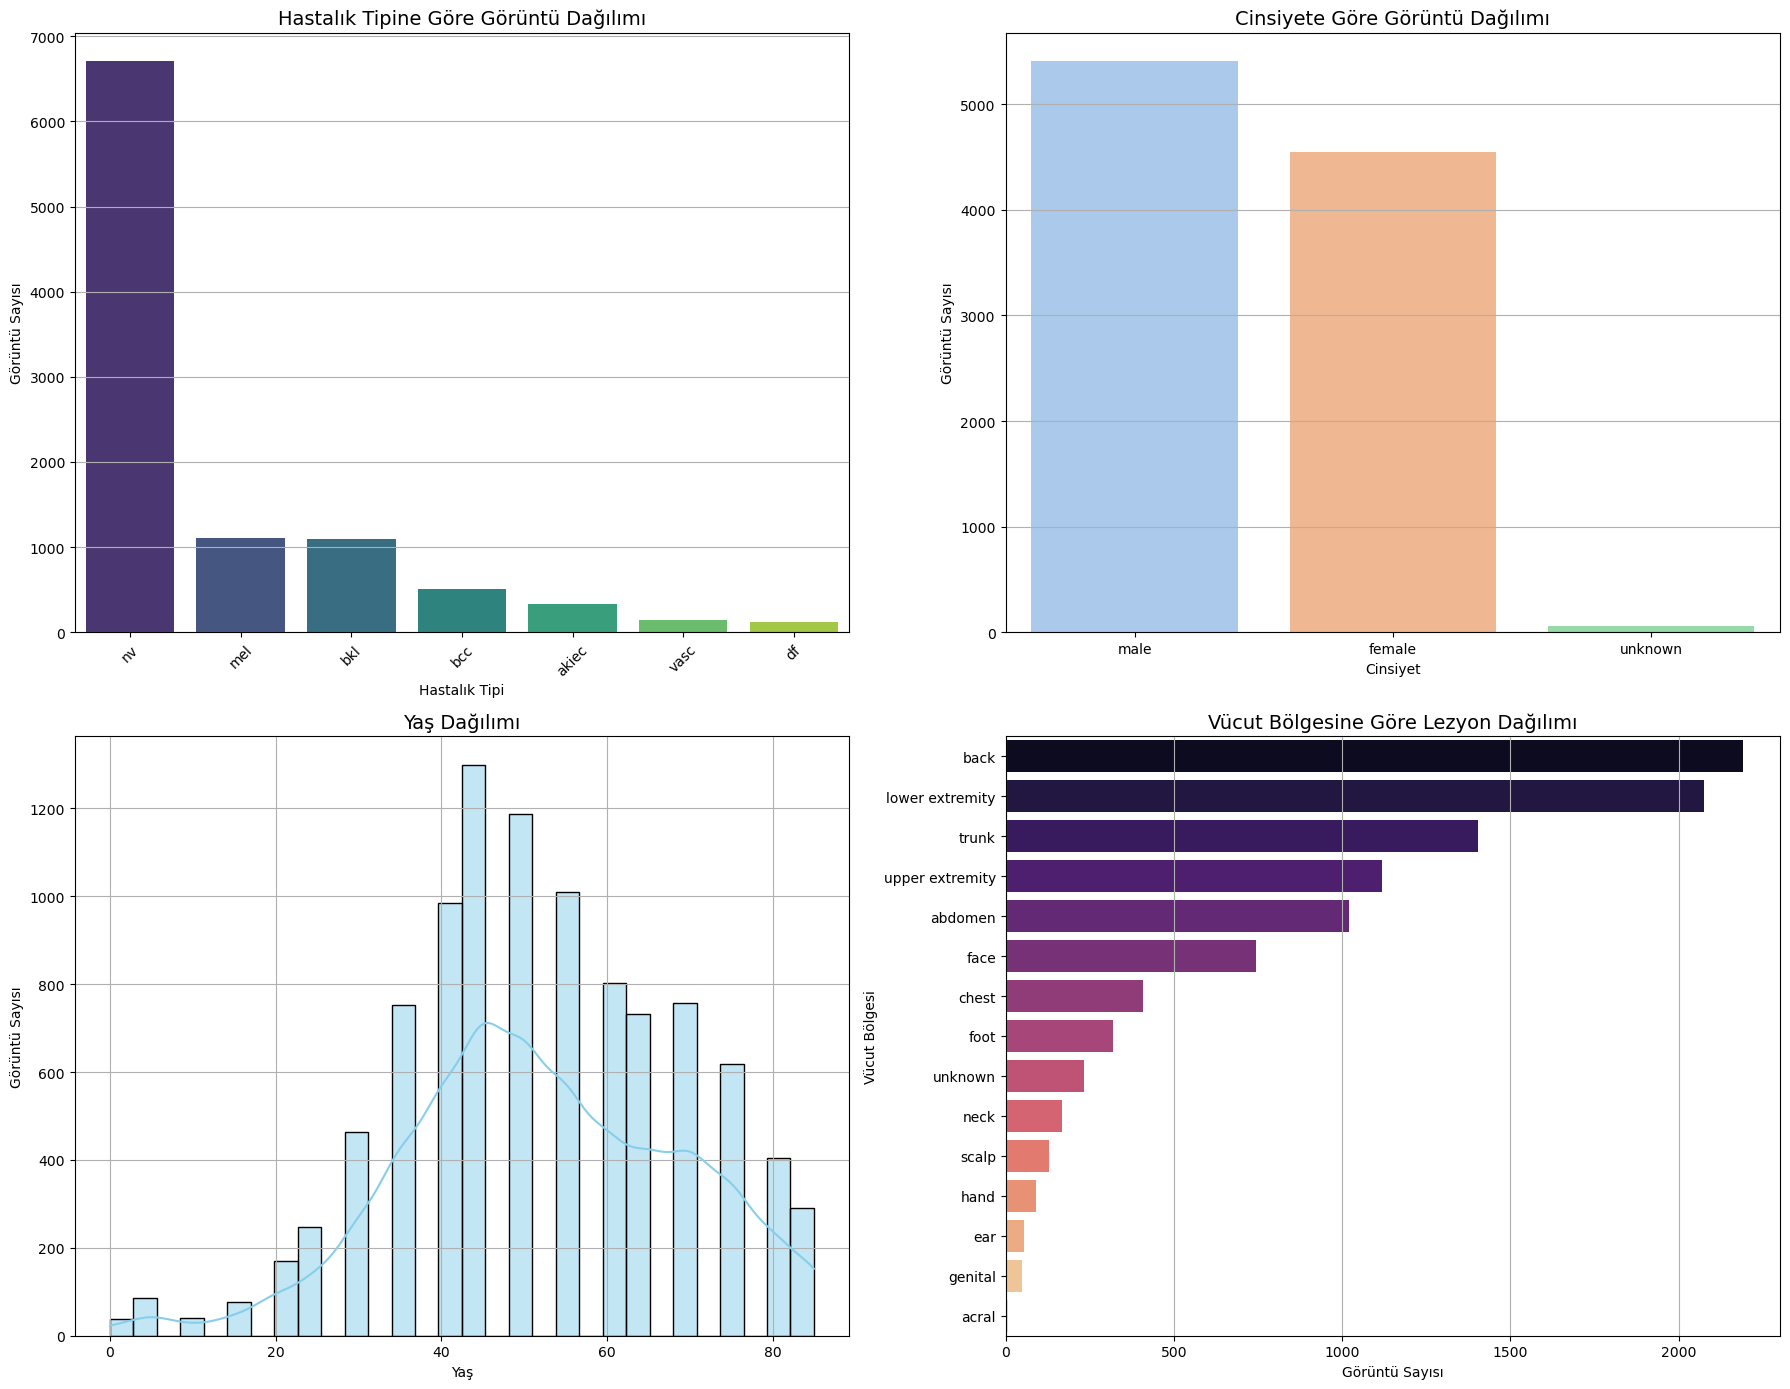

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarları
plt.figure(figsize=(18, 14))

# 1. subplot: Sınıf (dx) dağılımı
plt.subplot(2, 2, 1)
sns.countplot(data=df_data, x='dx', order=df_data['dx'].value_counts().index, palette="viridis")
plt.title("Hastalık Tipine Göre Görüntü Dağılımı", fontsize=14)
plt.xlabel("Hastalık Tipi")
plt.ylabel("Görüntü Sayısı")
plt.xticks(rotation=45)
plt.grid(axis='y')

# 2. subplot: Cinsiyet (sex) dağılımı
plt.subplot(2, 2, 2)
sns.countplot(data=df_data, x='sex', palette="pastel")
plt.title("Cinsiyete Göre Görüntü Dağılımı", fontsize=14)
plt.xlabel("Cinsiyet")
plt.ylabel("Görüntü Sayısı")
plt.grid(axis='y')

# 3. subplot: Yaş (age) dağılımı
plt.subplot(2, 2, 3)
sns.histplot(df_data['age'], bins=30, kde=True, color="skyblue")
plt.title("Yaş Dağılımı", fontsize=14)
plt.xlabel("Yaş")
plt.ylabel("Görüntü Sayısı")
plt.grid()

# 4. subplot: Vücut bölgesi (localization) dağılımı
plt.subplot(2, 2, 4)
sns.countplot(data=df_data, y='localization', order=df_data['localization'].value_counts().index, palette="magma")
plt.title("Vücut Bölgesine Göre Lezyon Dağılımı", fontsize=14)
plt.xlabel("Görüntü Sayısı")
plt.ylabel("Vücut Bölgesi")
plt.grid(axis='x')

plt.tight_layout()
plt.show()


In [27]:
# 1. Benzersiz lezyon_id'lerin sayısını bul
unique_lesions = df_data['lesion_id'].nunique()

print(f"Benzersiz (unique) lesion_id sayısı: {unique_lesions}")

Benzersiz (unique) lesion_id sayısı: 7470
